# Mehrdimensionale Differentialrechnung - Vorlesung

**Themenüberblick:** 

- Einführung: differentiale Größen, Auswahl an Anwendungen
- lineare Approximation von Funktionen: erste Ableitung, partielle Ableitung, Gradient, (totales) Differential
- Rechnen mit Differentialen: Jacobimatrix, Kettenregel

**zusätzliche Unterlagen:** 

- `9_Ableitung_Gradient_Differential-scan.pdf`
- `10_Rechnen_mit_Differentialen_Taylorreihe-scan.pdf`

In [1]:
%pylab inline
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


## Einführung

**Differentiale Größen:** 

Oft ist nicht (nur) der Wert einer Größe $y$ interessant sondern seine Änderung im Verhältnis zur Änderung einer anderen Größe $x$. Man arbeitet dann mit Begriffen wie  (Änderungs-)Rate, Preis, Steigung, spezifische Größe, (z. B. Wärme-)Kapazität, Ableitung, partielle Ableitung, totale Ableitung, Differential, Gradient, etc. 

Mathematisch wird die Abhängigkeit einer Größe $y$ von einer Größe $x$ als Funktion $y = f(x)$, oder kurz $y(x)$, beschrieben. Hängt $y$ von $n$ anderen Größen $x_1, x_2, \ldots , x_n$ ab, dann betrachtet man eine Funktion $y = f(x_1, x_2, \ldots , x_n),$ oder kurz $y(x_1, x_2, \ldots , x_n)$. Die Berechnung und Verwendung der Änderung von $y$ pro Änderung von $x$ bzw. $x_k$ ist das Gebiet der eindimensionalen bzw. mehrdimensionalen Differentialrechnung.

**Auswahl an Anwendungen:**

- lineare Approximation nicht-linearer Funktionen
- Taylorreihe: Verallgemeinerung zu polynomialer Approximation nicht-linearer Funktionen
- Optimalitätsbedingungen für nicht-lineare Optimierung
- kontinuierliche, (nicht-)lineare dynamische Systeme: gewöhnliche und partielle Differentialgleichungen
- Physik, Chemie, Technik: Mechanik, Thermodynamik, Elektrodynamik etc.
- Lösen nicht-linearer Gleichungen und Gleichungssysteme
- Variationsrechnung, Theorie der optimalen Steuerungen

## Lineare Approximation von Funktionen

*Achtung:* Genau genommen wird nicht die Funktion linear approximiert sondern die Änderung der Funktion bei einem bestimmten Inputwert. Die lineare Approximation einer Funktion selbst ist aber anschließend eine einfache Folgerung, siehe auch Taylorreihe.

**eindimensionaler Fall:** $y = f(x)$

*Beispiel:* $y = f(x) = x^2$, lineare Approximation bei $x_0 = 1$, Inputänderung $\Delta x = 1$

delta_x =  1
dx      =  1
delta_y =  3
dy      =  2


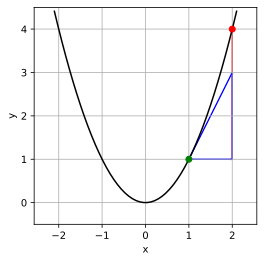

In [2]:
# Funktion f(x):
def my_f(x):
    return x**2

# erste Ableitung f'(x):
def my_f_p(x):
    return 2*x

# Vektor von x-Werten zum Plotten:
x = linspace(-2.1, 2.1) 

# Stelle der Approximation:
x0 = 1
y0 = my_f(x0)

# Änderungen:
delta_x = 1          # frei gewählte Änderung in der unabhängigen Größe x
dx      = delta_x    # Die lineare Approximation von delta_x ist gleich delta_x,
                     # da x eine unabhängige Größe ist.
print("delta_x = ", delta_x)
print("dx      = ", dx)

delta_y = my_f(x0 + dx) - my_f(x0)   # wahre Änderung, nicht linear approximiert
dy      = my_f_p(x0)*dx              # lineare Approximation von delta_y

print("delta_y = ", delta_y)
print("dy      = ", dy)

# Graph:
figure(figsize=(4,4))
plot(x, my_f(x), color='black')
plot(x0, y0, 'o', color='green')
plot(x0 + dx, y0 + delta_y, 'o', color='red')
arrow(x0,      y0, dx,      0, width=0.007, length_includes_head=True, color='blue')
arrow(x0 + dx, y0, 0, delta_y, width=0.007, length_includes_head=True, color='red')
arrow(x0 + dx, y0, 0,      dy, width=0.007, length_includes_head=True, color='blue')
arrow(x0     , y0, dx,     dy, width=0.007, length_includes_head=True, color='blue')
axis('equal')
ylim(-.5, 4.5)
xlabel('x')
ylabel('y')
grid(True)

*Nomenklatur:*

- $x_0$ ist die Stelle (Argument, Input), an der die Änderung der Funktion linear approximiert wird.
- $\Delta x$ ist die frei gewählte Differenz (Änderung) der unabhängigen Inputgröße (Variablen) $x$ bei $x_0$.
- $\text{d}x$ ist die lineare Approximation von $\Delta x$. Da $x$ keine Funktion einer anderen Größe ist, d. h. $x$ ist eine unabhängige Variable, ist die Approximation fehlerfei und man erhält $\text{d}x = \Delta x$. Wir schreiben vorwiegend $\text{d}x$.
- $\Delta y$ ist die wahre Differenz (Änderung) der Outputgröße $y$ bei Änderung der Inputgröße um $\Delta x$ bei $x_0$.
- $\text{d}y$ ist die lineare Approximation von $\Delta y$.

*Berechnungen:*

- $\Delta y = f(x_0 + \Delta x) - f(x_0)$
- $\text{d}y = f'(x_0)\,\text{d}x$. Daraus folgt $\frac{\text{d}y}{\text{d}x} = f'(x_0)$.

$\Delta y$ hängt im allgemeinen nicht-linear von $\text{d}x$ ab. Die lineare Approximation $\text{d}y$ dieser Abhängigkeit ist für eindimensionale Funktionen von der Form $\text{d}y = k\,\text{d}x$ für eine bestimmte Zahl $k$. Diese Zahl $k$ ist die erste Ableitung $f'(x_0)$ der Funktion $f$ bei $x_0$.

*Bemerkungen:*

- Für nicht-lineare Funktionen gilt im Allgemeinen $\Delta y \neq \text{d}y$.
- Für       lineare Funktionen gilt immer          $\Delta y   =  \text{d}y$.
- Je kleiner $\text{d}x$ umso besser approximiert $\text{d}y$ den wahren Wert $\Delta y$.

*erste Ableitung:*

Die erste Ableitung $f'(x_0)$ der Funktion $f$ bei $x_0$ gibt die Änderungsrate von $f$ bei $x_0$ pro $x$-Einheit an und entspricht der Steigung der Tangente an den Graphen von $f$ bei $x_0$. Wird die Stelle $x_0$ nicht spezifiziert, so erhält man eine Funktion von $x$ und schreibt $f'(x)$ oder kurz $f'$. Oft wird auch $y'(x_0)$, $y'(x)$, $y'$, $\dot{y}(x_0)$, $\dot{y}(x)$, oder $\dot{y}$ verwendet.

**mehrdimensionaler Fall:** $z = f(x, y)$

*Beispiel:* $z = f(x,y) = 0.05(x - 5)^2\sqrt{1 + y^2}$. *Achtung:* Wir verwenden im Folgenden zur grafischen Darstellung statt eines Graphen einen Konturplot!

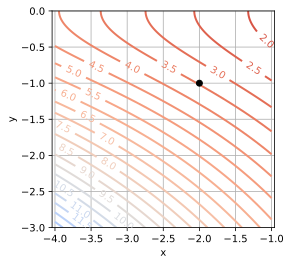

In [3]:
a = 0.05

def my_f(x, y):
    return a*(x - 5)**2*sqrt(1 + y**2)

def my_f_grad(x, y):
    return a*2*(x - 5)*sqrt(1 + y**2), a*(x - 5)**2*y/sqrt(1 + y**2)

x = linspace(-4, -1, 200)
y = linspace(-3,  0, 200)
X, Y = meshgrid(x, y)
Z = my_f(X, Y)

# Stelle:
x0 = -2
y0 = -1

# Konturplot:
figure(figsize(4,4))
cs = contour(X, Y, Z, arange(0, 20, 0.5), linewidths=2, cmap='coolwarm_r')
clabel(cs, fontsize=10, fmt='%1.1f')
plot(x0, y0,'o', color='black')
xlabel('x')
ylabel('y')
axis('equal')
grid(True)

Gradient:
  x-Komponente = -0.99
  y-Komponente = -1.73


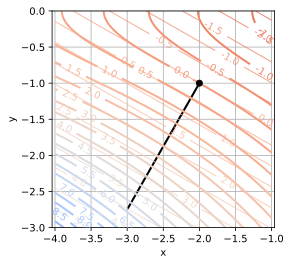

In [4]:
# wahre Differenz:
delta_Z = Z - my_f(x0, y0)

# Gradient (Vektor der partiellen Ableitungen) an der Stelle:
gx, gy = my_f_grad(x0, y0)
print("Gradient:\n  x-Komponente = {:.2f}\n  y-Komponente = {:.2f}".format(gx, gy))

# totales Differential: linear approximierte Differenz
dX = X - x0
dY = Y - y0

dZ = gx*dX + gy*dY

# Konturplots:
figure(figsize(4,4))
plot(x0, y0,'ok')
arrow(x0, y0, gx, gy, linewidth = 2)
cs = contour(X, Y, delta_Z, arange(-5, 15, 0.5), linewidths=2, cmap='coolwarm_r')
clabel(cs, fontsize=10, fmt='%1.1f')
cs = contour(X, Y, dZ, arange(-5, 15, 0.5), linewidths=1, alpha=0.75, cmap='coolwarm_r')
clabel(cs, fontsize=10, fmt='%1.1f')
xlabel('x')
ylabel('y')
axis('equal')
grid(True)

*Nomenklatur:*

- $(x_0, y_0)$ ist die Stelle (Argument, Input), an der die Änderung der Funktion linear approximiert wird.
- $\Delta x$ ist die Differenz (Änderung) der Inputgröße $x$ bei $(x_0, y_0)$, $\Delta y$ ist die Differenz (Änderung) der Inputgröße $y$ bei $(x_0, y_0)$.
- $\text{d}x$ ist die lineare Approximation von $\Delta x$, $\text{d}y$ ist die lineare Approximation von $\Delta y$. Es gilt analog zum eindimensionalen Fall $\text{d}x = \Delta x$ und $\text{d}y = \Delta y$. Wir schreiben vorwiegend $\text{d}x$ und $\text{d}y$.
- $\Delta z$ ist die wahre Differenz (Änderung) der Outputgröße $z$ bei Änderung der Inputgröße um $\Delta x$ und $\Delta y$  bei $(x_0, y_0)$.
- $\text{d}z$ ist die lineare Approximation von $\Delta z$.

*Berechnungen:*

- $\Delta z = f(x_0 + \Delta x, y_0 + \Delta y) - f(x_0, y_0)$
- $\text{d}z = \frac{\partial f}{\partial x}(x_0, y_0)\,\text{d}x + \frac{\partial f}{\partial y}(x_0, y_0)\,\text{d}y$. 

$\Delta z$ hängt im allgemeinen nicht-linear von $\text{d}x$ und $\text{d}x$ ab. Die lineare Approximation $\text{d}z$ dieser Abhängigkeit ist für zweidimensionale Funktionen von der Form $\text{d}z = k_x\,\text{d}x + k_y\,\text{d}y$ für bestimmte Zahlen $k_x$ und $k_y$. Diese Zahlen sind die partiellen Ableitung $\frac{\partial f}{\partial x}(x_0, y_0)$ und $\frac{\partial f}{\partial y}(x_0, y_0)$ der Funktion $f$ bei $(x_0, y_0)$ nach $x$ und nach $y$.

*Bemerkungen:*

- Für nicht-lineare Funktionen gilt im Allgemeinen $\Delta z \neq \text{d}z$.
- Für       lineare Funktionen gilt immer          $\Delta z   =  \text{d}z$.
- Je kleiner $\text{d}x$ und $\text{d}y$ umso besser approximiert $\text{d}z$ den wahren Wert $\Delta z$.


*partielle Ableitungen:*

- Die partielle Ableitung von $f$ bei $(x_0, y_0)$ in Richtung $x$ wird als $\frac{\partial f}{\partial x}(x_0, y_0)$ geschrieben. Sie gibt die Änderungsrate von $f$ bei $(x_0, y_0)$ pro $x$-Einheit an und entspricht der Steigung der Tangente in $x$-Richtung an den Graphen von $f$ bei $(x_0, y_0)$. Die partielle Ableitung von $f$ bei $(x_0, y_0)$ in Richtung $x$ wird durch Konstanthalten von $y$ und Ableiten nach $x$ berechnet.

- Die partielle Ableitung von $f$ bei $(x_0, y_0)$ in Richtung $y$ wird als $\frac{\partial f}{\partial y}(x_0, y_0)$ geschrieben. Sie gibt die Änderungsrate von $f$ bei $(x_0, y_0)$ pro $y$-Einheit an und entspricht der Steigung der Tangente in $y$-Richtung an den Graphen von $f$ bei $(x_0, y_0)$. Die partielle Ableitung von $f$ bei $(x_0, y_0)$ in Richtung $y$ wird durch Konstanthalten von $x$ und Ableiten nach $y$ berechnet.

Wird die Stelle $(x_0, y_0)$ nicht spezifiziert, so erhält man pro partieller Ableitung eine Funktion von $x$ und $y$ und schreibt z. B. $\frac{\partial f}{\partial x}(x, y)$ oder kurz $\frac{\partial f}{\partial x}$. 
Oft wird auch $\frac{\partial z}{\partial x}(x_0, y_0)$, $\frac{\partial z}{\partial x}(x, y)$ und $\frac{\partial z}{\partial x}$ verwendet.

*Beispiel:*

Für $z = f(x,y) = 3x^2y - y^2$ ist $\frac{\partial f}{\partial x} = 6xy$ und $\frac{\partial f}{\partial y} = 3x^2 - 2y$. An der Stelle $(x_0, y_0) = (1,2)$ ergeben sich die Werte $\frac{\partial f}{\partial x}(1,2) = 12$ und $\frac{\partial f}{\partial y}(1,2) = -1.$

*Gradient:*

An die Stelle der ersten Ableitung $f'$ im eindimensionalen Fall tritt im zweidimensionalen Fall der Gradient. Der Gradient $\text{grad}(f)$ ist der Vektor der partiellen Ableitungen. Wir schreiben ihn immer als Spaltenvektor:

$$\text{grad}(f) = \begin{pmatrix}\frac{\partial f}{\partial x} \\ \frac{\partial f}{\partial y}\end{pmatrix}.$$

Der Gradient an der Stelle $(x_0, y_0)$ ist der Koeffizientenvektor der linearen Approximation $\text{d}z$ von $\Delta z$. Aus der linearen Algebra wissen wir, dass die Konturlinien der linearen Approzimation $\text{d}z$ parallele, äquidistante Geraden sind und der Koeffizientenvektor, also der Gradient, orthogonal auf die Konturlinien ist und in die Richtung der stärksten Zunahme von $\text{d}z$ zeigt.

*weitere Schreibweisen und Begriffe:*

- Eine andere und ebenfalls übliche Schreibweise für den Gradienten $\text{grad}(f)$ einer Funktion $f$ ist $\nabla f$, wobei $\nabla$ der sogenannte Nabla-Operator ist: 

  $$\nabla = \begin{pmatrix}\frac{\partial}{\partial x} \\ \frac{\partial}{\partial y}\end{pmatrix}$$
  
- Statt z. B. $\frac{\partial f}{\partial x}$ wird oft die Kurzschreibweise $f_x$ oder $f_{|x}$ verwendet.
- Statt dem Funktionsnamen wird im ein- und mehrdimensionalen Fall oft der Name der Outputgröße verwendet und umgekehrt, z. B., $\text{grad}(z)$ statt $\text{grad}(f)$ oder $\text{d}f$ statt $\text{d}z$.

*(totales) Differential:*

Die lineare Approximation $\text{d}z$ wird als das totale Differential, oder kurz das Differential von $z$ bezeichnet. Es kann als inneres Produkt des Gradienten mit dem Vektor der Inputgößenänderungen geschrieben werden: 

$$\text{d}z = \frac{\partial f}{\partial x}\,\text{d}x + \frac{\partial f}{\partial y}\,\text{d}y = \begin{pmatrix}\frac{\partial f}{\partial x} \\ \frac{\partial f}{\partial y}\end{pmatrix}^T \begin{pmatrix}\text{d}x \\ \text{d}y \end{pmatrix}$$

*Beispiel:*

Für $z = f(x,y) = 3x^2y - y^2$ und $(x_0, y_0) = (1,2)$ ergeben sich:

- $\text{grad}(f) = \nabla f = \begin{pmatrix} 6xy \\ 3x^2 - 2y \end{pmatrix}$
- $\text{grad}(f)(1,2) = \nabla f(1,2) = \begin{pmatrix} 12 \\ -1 \end{pmatrix}$
- $\text{d}z = 6xy\,\text{d}x + (3x^2 - 2y)\,\text{d}y$
- bei $(1,2)$ ist $\text{d}z = 12\,\text{d}x - \text{d}y$
- mit zusätzlich $\text{d}x = 0.1$ und $\text{d}y = 0.2$: 

    + $\Delta z = f(1.1, 2.2) - f(1,2) = 1,146$
    + $\text{d}z = 12\cdot 0.1 - 0.2 = 1$

*Verallgemeinerung auf den $n$-dimensionalen Fall:*

Die Verallgemeinerung auf eine $n$-dimensionale, skalare Funktion $y = f(x_1, x_2, \ldots, x_n)$ ist einfach:

- $\text{grad}(f) = \begin{pmatrix}\frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \\ \vdots \\ \frac{\partial f}{\partial x_n} \end{pmatrix}$
- $\text{d}z = \frac{\partial f}{\partial x_1}\,\text{d}x_1 + \frac{\partial f}{\partial x_2}\,\text{d}x_2 + \ldots \frac{\partial f}{\partial x_n}\,\text{d}x_n$

## Rechnen mit Differentialen

**Beispiele:**

*Beispiel 1:* $y(x) = \sin(3x)$: $\text{d}y = 3\cos(3x)\,\text{d}x$

*Beispiel 2:* $z(x,y) = y^2\ln(x)$: $\text{d}z = \frac{y^2}{x}\,\text{d}x + 2y\ln(x)\,\text{d}y$

*Beispiel 3:* zwei skalare Funktionen, die von der selben unabhängigen Variablen abhängen: $x(t) = \cos(\omega t)$ und $y(t) = \sin(\omega t)$: 

$$\begin{align}
\text{d}x &= -\omega\sin(\omega t)\,\text{d}t \\
\text{d}y &=  \omega\cos(\omega t)\,\text{d}t
\end{align}$$

in Vektorform: 

$$\begin{pmatrix} \text{d}x \\ \text{d}y \end{pmatrix} = \begin{pmatrix} -\omega\sin(\omega t) \\ \omega\cos(\omega t) \end{pmatrix} \text{d}t$$ 

und nach Division durch $\text{d}t$: 

$$\begin{pmatrix} \frac{\text{d}x}{\text{d}t} \\ \frac{\text{d}y}{\text{d}t} \end{pmatrix} = \begin{pmatrix} -\omega\sin(\omega t) \\ \omega\cos(\omega t) \end{pmatrix}$$

Falls $x$ und $y$ Ortskoordinaten sind und $t$ die Bedeutung Zeit hat, dann ist dies der Geschwindigkeitsvektor.
  
*Beispiel 4:* zwei skalare Funktionen, die von den selben zwei unabhängigen Variablen abhängen: $x(r,\varphi) = r\cos(\varphi)$ und $y(r, \varphi) = r\sin(\varphi)$: 

$$\begin{align}
\text{d}x &= \cos(\varphi)\,\text{d}r - r\sin(\varphi)\,\text{d}\varphi \\
\text{d}y &= \sin(\varphi)\,\text{d}r + r\cos(\varphi)\,\text{d}\varphi
\end{align}$$

in Matrixform: 

$$\begin{pmatrix} \text{d}x \\ \text{d}y \end{pmatrix} = 
\begin{pmatrix} \cos(\varphi) & - r\sin(\varphi) \\ 
              \sin(\varphi) &   r\cos(\varphi)
\end{pmatrix}
\begin{pmatrix} \text{d}r \\ \text{d}\varphi \end{pmatrix}$$

Die $2\times 2$ Matrix 
$\begin{pmatrix} \cos(\varphi) & - r\sin(\varphi) \\ 
               \sin(\varphi) &   r\cos(\varphi)
\end{pmatrix}$ ist die sogenannte **Jacobimatrix** der Funktion $f:\mathbb{R}^2 \rightarrow \mathbb{R}^2: \begin{pmatrix} r \\ \varphi \end{pmatrix} \mapsto \begin{pmatrix} r\cos(\varphi) \\ r\sin(\varphi) \end{pmatrix}$. Die Jacobimatrix enthält alle partiellen Ableitungen:

$$\begin{pmatrix} \cos(\varphi) & - r\sin(\varphi) \\ 
              \sin(\varphi) &   r\cos(\varphi)
\end{pmatrix} =
\begin{pmatrix} \frac{\partial x}{\partial r} & \frac{\partial x}{\partial \varphi} \\ 
              \frac{\partial y}{\partial r} & \frac{\partial y}{\partial \varphi}
\end{pmatrix}$$

**Kettenregel:**

*Beispiel:* $x(r,\varphi) = r\cos(\varphi)$, $y(r, \varphi) = r\sin(\varphi)$, $r(t) = \sqrt{t}$ und $\varphi(t) = \omega t$. 
Wir berechnen zuerst die Differentiale von $x(r,\varphi)$ und $y(r,\varphi)$. 
Anschließend setzen wir die Ausdrücke für $r(t)$ und $\varphi(t)$ sowie deren Differentiale ein:

$$\begin{align}
\text{d}x &= \cos(\varphi)\,\text{d}r - r\sin(\varphi)\,\text{d}\varphi \\
          &= \cos(\omega t)\frac{1}{2\sqrt{t}}\,\text{d}t - \sqrt{t}\sin(\omega t)\omega\,\text{d}t \\
          &= \left(\cos(\omega t)\frac{1}{2\sqrt{t}} - \sqrt{t}\sin(\omega t)\omega \right) \text{d}t \\
\text{d}y &= \sin(\varphi)\,\text{d}r + r\cos(\varphi)\,\text{d}\varphi \\
          &= \sin(\omega t)\frac{1}{2\sqrt{t}}\,\text{d}t + \sqrt{t}\cos(\omega t)\omega\,\text{d}t \\
          &= \left(\sin(\omega t)\frac{1}{2\sqrt{t}} + \sqrt{t}\cos(\omega t)\omega \right) \text{d}t
\end{align}$$

Das selbe Ergbenis erhält man, wenn man zuerst die Funktionen verknüpft und anschließend die Differentiale berechnet:

$$\begin{align}
x(t)      &= \sqrt{t}\cos(\omega t) \\
\text{d}x &= \left(\frac{1}{2\sqrt{t}}\cos(\omega t) - \sqrt{t}\sin(\omega t)\omega \right) \text{d}t \\
y(t)      &= \sqrt{t}\sin(\omega t) \\
\text{d}y &= \left(\frac{1}{2\sqrt{t}}\sin(\omega t) + \sqrt{t}\cos(\omega t)\omega \right) \text{d}t
\end{align}$$

Die Äquivalenz beider Vorgehensweisen ist die Verallgemeinerung der Kettenregel aus der eindimensionalen Differentialrechnung.